In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [24]:
# Load datasets
file_path_1 = '17_03_2020_01_01_2021_DEU.csv'  
file_path_2 = '17_03_2020_01_01_2021_CHN.csv' 
file_path_3 = 'Full_Dataset_Cleaned1.csv'      
file_path_4 = '01_01_2020_01_01_2021_bra.csv'  
file_path_5 = '01_01_2020_01_01_2021_esp.csv'  
file_path_6 = '01_01_2020_01_01_2021_ind.csv'   
file_path_7 = '01_01_2020_01_01_2021_ita.csv' 
file_path_8 = '17_03_2020_01_01_2021_TUR.csv'    
file_path_9 = '17_03_2020_01_01_2021_USA.csv'    

data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)
data_3 = pd.read_csv(file_path_3)
data_4 = pd.read_csv(file_path_4)
data_5 = pd.read_csv(file_path_5)
data_6 = pd.read_csv(file_path_6)
data_7 = pd.read_csv(file_path_7)
data_8 = pd.read_csv(file_path_8)
data_9 = pd.read_csv(file_path_9)

In [79]:
# Ensure date columns are in datetime format
data_1['date'] = pd.to_datetime(data_1['date'])
data_2['date'] = pd.to_datetime(data_2['date'])
data_4['date'] = pd.to_datetime(data_4['date'])
data_5['date'] = pd.to_datetime(data_5['date'])
data_6['date'] = pd.to_datetime(data_6['date'])
data_7['date'] = pd.to_datetime(data_7['date'])
data_8['date'] = pd.to_datetime(data_8['date'])
data_9['date'] = pd.to_datetime(data_9['date'])

# Ensure the 'Publication_Date' column is in datetime format
data_3['Publication_Date'] = pd.to_datetime(data_3['Publication_Date'], dayfirst=True, errors='coerce')

data_1['Country'] = 'Germany'
data_2['Country'] = 'China'
data_4['Country'] = 'Brazil'
data_5['Country'] = 'Spain'
data_6['Country'] = 'India'
data_7['Country'] = 'Italy'
data_8['Country'] = 'Turkey'
data_9['Country'] = 'USA'


,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,iso,name,province,lat,long,cities,Country
0,2020-03-17,9257,24,67,1985,7,0,2020-03-17 18:53:02,9166,1978,0.0026,DEU,Germany,NaN,51.1657,10.4515,[],Germany
1,2020-03-18,12327,28,105,3070,4,38,2020-03-18 19:33:02,12194,3028,0.0023,DEU,Germany,NaN,51.1657,10.4515,[],Germany
2,2020-03-19,15320,44,113,2993,16,8,2020-03-19 20:13:08,15163,2969,0.0029,DEU,Germany,NaN,51.1657,10.4515,[],Germany
3,2020-03-20,19848,67,180,4528,23,67,2020-03-20 20:13:15,19601,4438,0.0034,DEU,Germany,NaN,51.1657,10.4515,[],Germany
4,2020-03-21,22213,84,233,2365,17,53,2020-03-21 20:43:02,21896,2295,0.0038,DEU,Germany,NaN,51.1657,10.4515,[],Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2021-01-01,137031,3302,100200,1569,36,2900,2021-01-02 05:22:33,33529,-1367,0.0241,DEU,Germany,Sachsen,51.1045,13.2017,[],Germany
4015,2021-01-01,31041,679,23248,561,15,823,2021-01-02 05:22:33,7114,-277,0.0219,DEU,Germany,Sachsen-Anhalt,51.9503,11.6923,[],Germany
4016,2021-01-01,25247,436,19000,113,9,625,2021-01-02 05:22:33,5811,-521,0.0173,DEU,Germany,Schleswig-Holstein,54.2194,9.6961,[],Germany
4017,2021-01-01,43875,1027,31186,597,15,1589,2021-01-02 05:22:33,11662,-1007,0.0234,DEU,Germany,Thuringen,51.0110,10.8453,[],Germany


In [97]:
# Group by 'Publication_Date' and count the number of articles for each date
news_by_date = data_3.groupby('Publication_Date').size().reset_index(name='news_count')

# Rename 'Publication_Date' to 'date' for consistency
news_by_date.rename(columns={'Publication_Date': 'date'}, inplace=True)

# Merge this data with the fatalities dataset
fatalities_by_date = data_1.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_2.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_4.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_5.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_6.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_7.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_8.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_9.groupby('date')['deaths'].sum().reset_index()

merged_data1 = pd.concat([data_1, data_2, data_4,data_5, data_6, data_7,data_8, data_9], ignore_index=True)

# Merge the datasets on 'date'
merged_data = pd.merge(fatalities_by_date, news_by_date, on='date', how='inner')

# Ensure both datasets have a 'date' column in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data1['date'] = pd.to_datetime(merged_data1['date'])

# Merge the datasets on 'date'
final_data = pd.merge(merged_data1, merged_data[['date', 'news_count']], on='date', how='inner')

# Check the result
print(final_data.head())

        date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
0 2020-03-17       9257      24         67            1985            7   
1 2020-03-18      12327      28        105            3070            4   
2 2020-03-19      15320      44        113            2993           16   
3 2020-03-20      19848      67        180            4528           23   
4 2020-03-21      22213      84        233            2365           17   

   recovered_diff          last_update  active  active_diff  fatality_rate  \
0               0  2020-03-17 18:53:02    9166         1978         0.0026   
1              38  2020-03-18 19:33:02   12194         3028         0.0023   
2               8  2020-03-19 20:13:08   15163         2969         0.0029   
3              67  2020-03-20 20:13:15   19601         4438         0.0034   
4              53  2020-03-21 20:43:02   21896         2295         0.0038   

   iso     name province      lat     long cities  Country  news_count  
0  DEU 

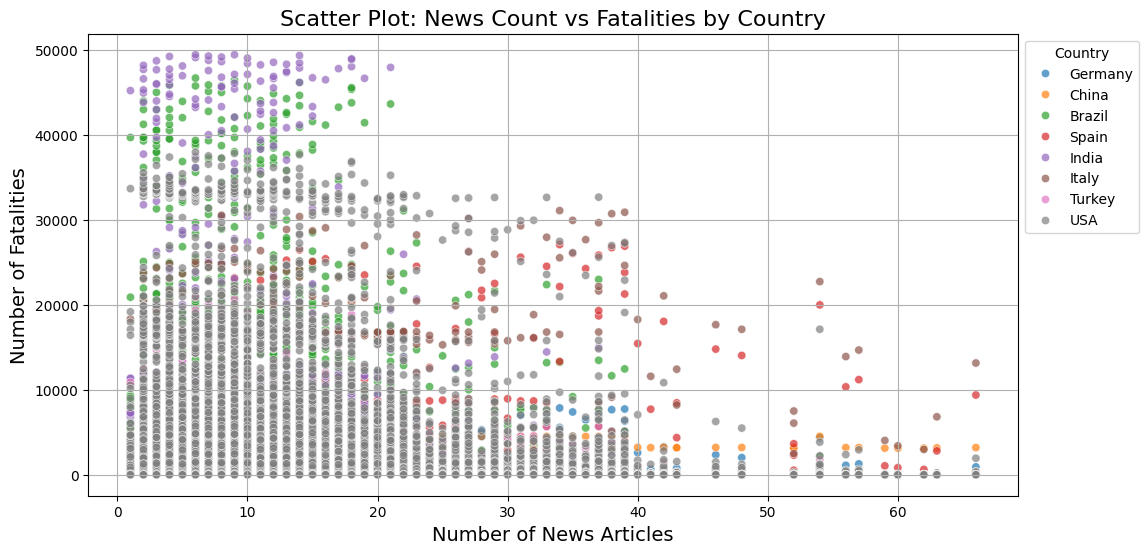

In [98]:
# Ensure all required columns are present for plotting (e.g., news_count and deaths)
if 'news_count' not in merged_data.columns:
    merged_data['news_count'] = merged_data.groupby('date')['date'].transform('count')  
if 'deaths' not in merged_data.columns:
    merged_data['deaths'] = merged_data['deaths_diff'].cumsum()  # Calculate cumulative deaths if not present

# Scatter plot: News Count vs Fatalities by Country
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_data, x='news_count', y='deaths', hue='Country', palette='tab10', alpha=0.7)
plt.title('Scatter Plot: News Count vs Fatalities by Country', fontsize=16)
plt.xlabel('Number of News Articles', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

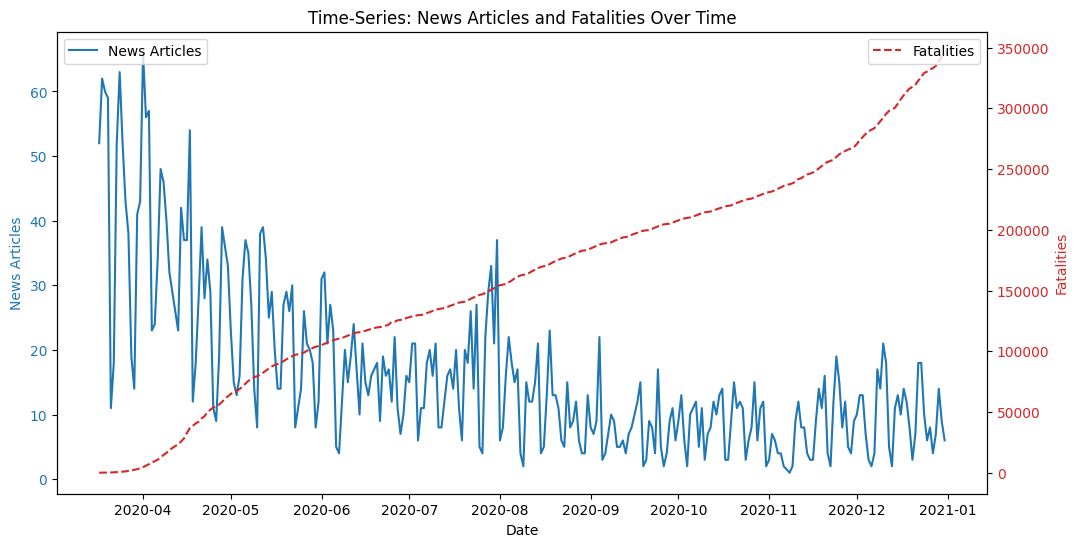

In [29]:
#Time-Series Overlay: News Count and Fatalities Over Time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot News Count
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('News Articles', color=color)
ax1.plot(merged_data['date'], merged_data['news_count'], color=color, label='News Articles')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Plot Fatalities
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Fatalities', color=color)
ax2.plot(merged_data['date'], merged_data['deaths'], color=color, label='Fatalities', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Time-Series: News Articles and Fatalities Over Time')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16604\3328502767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=misinfo_type_counts.index, y=misinfo_type_counts.values, palette='viridis')


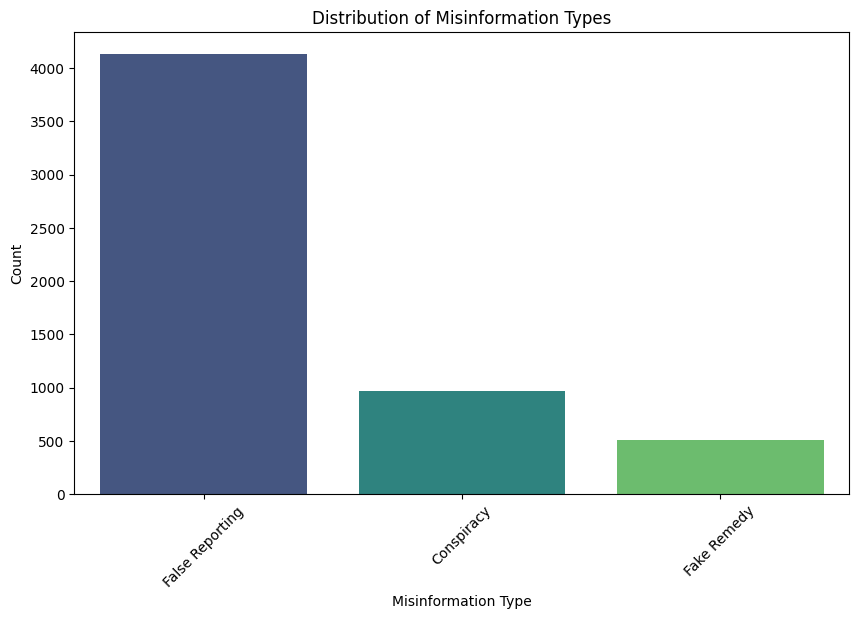

In [32]:
#Bar Chart: Distribution of Misinformation Types
plt.figure(figsize=(10, 6))
misinfo_type_counts = data_3['Misinfo_Type'].value_counts()
sns.barplot(x=misinfo_type_counts.index, y=misinfo_type_counts.values, palette='viridis')
plt.title('Distribution of Misinformation Types')
plt.xlabel('Misinformation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

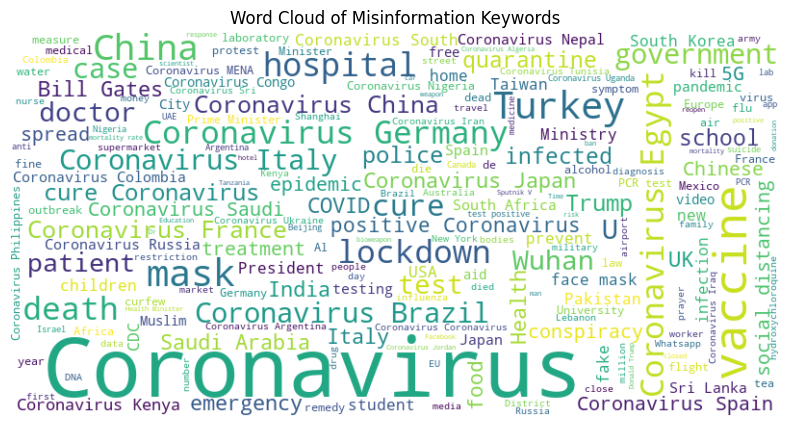

In [36]:
#Word Cloud: Common Keywords in Misinformation
all_keywords = ' '.join(data_3['Key_Words'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Misinformation Keywords')
plt.show()